- 머신러닝 알고리즘은 모델의 구조가 어느 정도 고정되어 있음
    - 좋은 성능을 내기 위해서는 매개변수를 조정하고 훈련하는 과정을 반복
- 딥러닝은 구조를 직접 설계해야함
    - 좋은 성능을 내기 위해 다룰 수 있는 다양한 개념과 도구들은 이해할 필요가 있음

# 손실 곡선

- 케라스의 fit() 메서드는 History 클래스의 객체를 반환
    - History 객체 : 훈련 과정에서 계산한 지표(손실과 정확도값)가 저장되어 있음
    - 이 값을 사용하여 그래프를 그려서 훈련 성과를 확인

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
scaled_train = x_train / 255
scaled_train, scaled_val, y_train, y_val = train_test_split(
    scaled_train, y_train, test_size=0.2, random_state=12
)

In [5]:
# 모델 정의
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation="relu"))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation="softmax"))

    return model

In [6]:
model = model_fn()
model.summary()

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
history = model.fit(scaled_train, y_train, epochs=5, verbose=1)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7652 - loss: 0.6767
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8543 - loss: 0.4022
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8699 - loss: 0.3603
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8769 - loss: 0.3361
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8838 - loss: 0.3187


- verbose
    - 훈련 과정 출력을 조정
    - 0 : 훈련 과정 출력 안함
    - 1 : 에포크마다 진행 막대와 함께 지표 출력
    - 2 : 진행 막대를 빼고 출력

In [9]:
# history 객체 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


- 기본적으로 손실을 계산하고 compile 에서 accuracy를 추가하여 loss와 accuracy가 포함됨

In [10]:
history.history

{'accuracy': [0.812458336353302,
  0.8580416440963745,
  0.8713541626930237,
  0.8785625100135803,
  0.8834375143051147],
 'loss': [0.5348706245422363,
  0.39376160502433777,
  0.3570212125778198,
  0.3337029218673706,
  0.3213989734649658]}

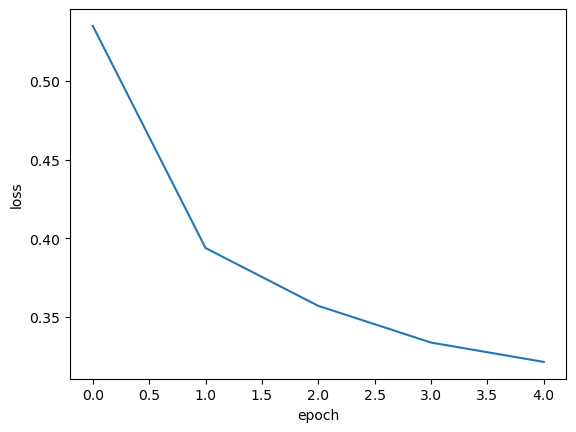

In [13]:
plt.figure()

plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")

plt.show()

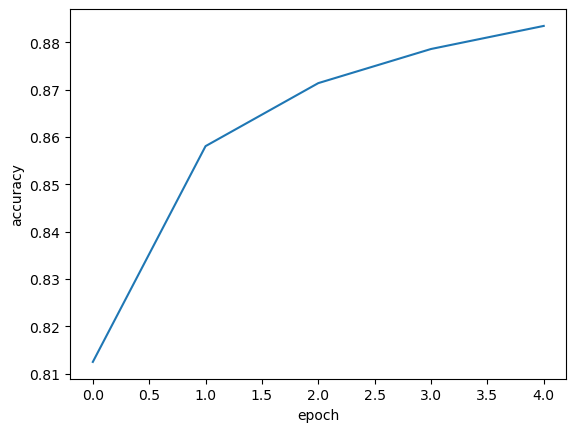

In [14]:
plt.figure()
plt.plot(history.history["accuracy"])

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [16]:
# epoch를 20으로 늘려서 그래프 확인
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(scaled_train, y_train, epochs=20)

Epoch 1/20


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7621 - loss: 0.6807
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8503 - loss: 0.4115
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8706 - loss: 0.3577
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8804 - loss: 0.3309
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8848 - loss: 0.3161
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8886 - loss: 0.3099
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8917 - loss: 0.3019
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8938 - loss: 0.2963
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8983 - loss: 0.2834
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9018 - loss: 0.2776
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9042 - loss: 0.2699
Epoch 12/20
1500/1500 ━━━━━━━━━━━━━━━━━━━

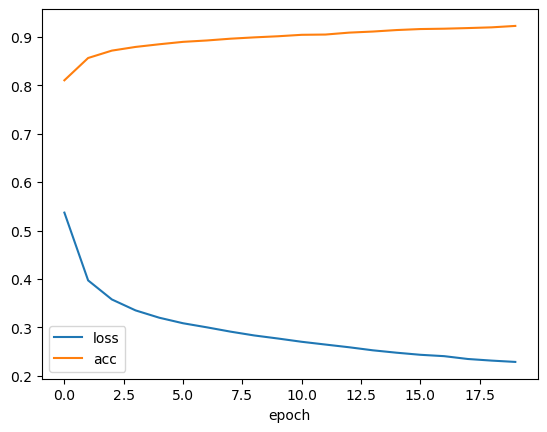

In [17]:
plt.figure()

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["accuracy"], label="acc")

plt.legend()
plt.xlabel("epoch")

plt.show()

# 검증 손실

- 에포크에 따른 과대적합과 과소적합을 파악하려면 검증 세트에 대한 점수도 확인해야함
- 케라스에서는 fit() 메서드에 검증 데이터를 전달할 수 있음

In [18]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    scaled_train, y_train, epochs=20, validation_data=(scaled_val, y_val)
)

Epoch 1/20


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7642 - loss: 0.6790 - val_accuracy: 0.8245 - val_loss: 0.4799
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8524 - loss: 0.4064 - val_accuracy: 0.8735 - val_loss: 0.3590
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8712 - loss: 0.3558 - val_accuracy: 0.8627 - val_loss: 0.3889
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8806 - loss: 0.3404 - val_accuracy: 0.8858 - val_loss: 0.3379
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8834 - loss: 0.3227 - val_accuracy: 0.8810 - val_loss: 0.3555
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8919 - loss: 0.3001 - val_accuracy: 0.8895 - val_loss: 0.3416
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8959 - loss: 0.2962 - val_accuracy: 0.8811 - val_loss: 0.3663
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8985 - loss: 0.2869 - val_accurac

In [19]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


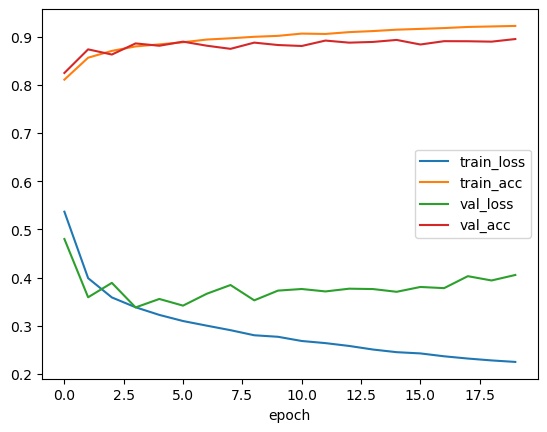

In [20]:
plt.figure()

plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()
plt.xlabel("epoch")

plt.show()

- 훈련 손실은 계속 감소하는데 검증 손실은 감소하다가 상승하여 과대적합 모델이 만들어짐
    - 검증 손실이 상승하는 시점을 가능한한 뒤로 늦출 필요가 있음

In [21]:
# Adam 옵티마이저 선택
model = model_fn()
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history = model.fit(
    scaled_train, y_train, epochs=20, validation_data=(scaled_val, y_val)
)

Epoch 1/20


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7698 - loss: 0.6621 - val_accuracy: 0.8415 - val_loss: 0.4418
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8538 - loss: 0.4083 - val_accuracy: 0.8662 - val_loss: 0.3868
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8709 - loss: 0.3605 - val_accuracy: 0.8756 - val_loss: 0.3517
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8809 - loss: 0.3249 - val_accuracy: 0.8796 - val_loss: 0.3468
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8867 - loss: 0.3068 - val_accuracy: 0.8723 - val_loss: 0.3497
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8921 - loss: 0.2947 - val_accuracy: 0.8841 - val_loss: 0.3239
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8960 - loss: 0.2845 - val_accuracy: 0.8838 - val_loss: 0.3316
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9015 - loss: 0.2651 - val_accurac

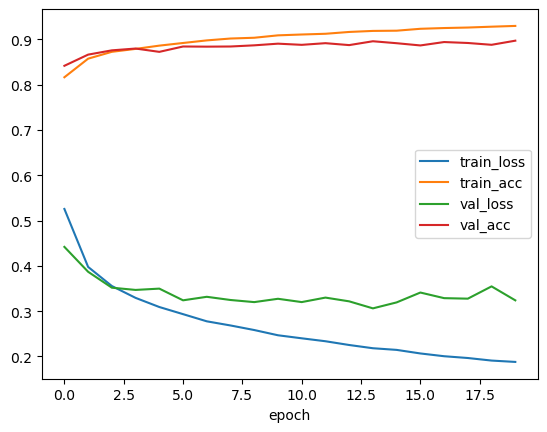

In [22]:
plt.figure()

plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()
plt.xlabel("epoch")

plt.show()

- RMSprop 을 사용할 때 보다 검증 손실 그래프의 감소 추세가 길게 이어지고 있어 Adam 옵티마이저가 이 데이터셋에 잘 맞는 것으로 보임

# 드롭아웃(dropout)

<img src="./img/dropout.png">

- 훈련 과정에서 층의 일부 유닛을 랜덤하게 끄는 것으로(출력을 0으로 만드는것) 과대적합을 방지
    - 특정 유닛에 과대하게 의존하는 것을 줄일 수 있음
    - 일부 유닛의 출력이 없을 수 있다는 것을 감안하여 학습하게 됨
        - 모든 입력값에 대해 충분한 주의를 기울이는 방향으로 학습
- 드롭아웃은 케라스에서 Dropout 클래스로 제공
- 특정 층 뒤에 드롭아웃을 두어 해당 충의 출력을 랜덤하게 0으로 만듦
- Flatten과 마찬가지로 층처럼 사용되지만 훈련되는 모델 파라미터는 없음

In [23]:
model = model_fn(keras.layers.Dropout(0.3))  # 30% 드롭아웃
model.summary()

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 드롭아웃층은 입력과 출력의 크기가 같음
    - 일부 유닛의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지 않음
- 모델 훈련이 끝난 후에 평가나 예측을 수행할 때에는 드롭아웃을 적용하지 않아야 함
    - 훈련된 모든 유닛을 사용해야 올바른 예측을 수행할 수 있기 때문에
    - 케라스에서는 모델을 평가와 예측에 사용할 때에는 자동으로 드롭아웃을 적용하지 않음

In [24]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [25]:
history = model.fit(
    scaled_train, y_train, epochs=20, validation_data=(scaled_val, y_val)
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7253 - loss: 0.7836 - val_accuracy: 0.8533 - val_loss: 0.4118
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8354 - loss: 0.4538 - val_accuracy: 0.8583 - val_loss: 0.3894
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8527 - loss: 0.4050 - val_accuracy: 0.8687 - val_loss: 0.3600
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8601 - loss: 0.3816 - val_accuracy: 0.8766 - val_loss: 0.3480
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8633 - loss: 0.3684 - val_accuracy: 0.8774 - val_loss: 0.3460
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8699 - loss: 0.3548 - val_accuracy: 0.8800 - val_loss: 0.3291
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8725 - loss: 0.3462 - val_accuracy: 0.8858 - val_loss: 0.3255
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8761 - loss: 0.3327 - 

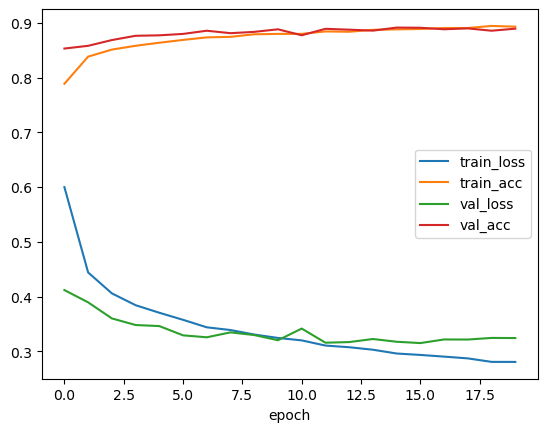

In [26]:
plt.figure()

plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()
plt.xlabel("epoch")

plt.show()

- 앞선 방법들에 비해 loss와 acc가 비교적 일정하게 유지됨

In [27]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history = model.fit(
    scaled_train, y_train, epochs=12, validation_data=(scaled_val, y_val)
)

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7354 - loss: 0.7570 - val_accuracy: 0.8411 - val_loss: 0.4383
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8331 - loss: 0.4626 - val_accuracy: 0.8687 - val_loss: 0.3636
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8513 - loss: 0.4018 - val_accuracy: 0.8662 - val_loss: 0.3690
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8574 - loss: 0.3884 - val_accuracy: 0.8778 - val_loss: 0.3466
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8624 - loss: 0.3722 - val_accuracy: 0.8797 - val_loss: 0.3361
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8665 - loss: 0.3597 - val_accuracy: 0.8823 - val_loss: 0.3296
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8736 - loss: 0.3436 - val_accuracy: 0.8855 - val_loss: 0.3228
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8749 - loss: 0.3372 - 

- 케라스 모델은 모델의 파라미터를 저장하는 save_weights() 메서드를 제공
- 모델 구조와 모델 파라미터를 제공하는 save() 메서드도 제공

In [72]:
model.save_weights("./model/model.weights.h5")

In [82]:
model.save("./model/model-whole.keras")

## 모델 파라미터만 읽어오기

In [86]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("./model/model.weights.h5")

- load_weights() 메서드를 사용하면 save_weights() 로 저장했던 모델과 정확히 같은 구조를 가져야함

In [87]:
val_labels = np.argmax(model.predict(scaled_val), axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step


In [88]:
val_labels

array([3, 0, 8, ..., 0, 7, 5], dtype=int64)

In [89]:
y_val

array([3, 0, 8, ..., 0, 7, 5], dtype=uint8)

In [90]:
np.mean(val_labels == y_val)

0.8889166666666667

- 케라스의 predict() 메서드는 모델의 예측을 수행
    - 종속변수가 10개의 클래스로 이루어져 잇기 때문에 각 클래스에 대한 확률을 반환
- predict() 결과에서 가장 큰 값을 고르기 위해 argmax() 함수를 사용
    - 배열에서 가장 큰 값의 인덱스를 반환
    - 몇 번째 클래스에 대한 확률값이 가장 큰 지 반환
        - 몇 번째 클래스로 예측했는지 알 수 있음
- argmax()로 고른 인덱스와 타깃 인덱스를 비교하여 같으면 True, 다르면 False
    - 위 값의 평균을 구하면 정확도가 됨

## 모델 전체 읽어오기

In [91]:
model = keras.models.load_model("./model/model-whole.keras")

In [92]:
model.evaluate(scaled_val, y_val)

ValueError: No loss to compute. Provide a `loss` argument in `compile()`.